In [1]:
import os
os.chdir(r"C:\Users\ashto\DAPPEr-main") #change directory to dapper-main folder
current_directory = os.getcwd()
print(f"Current directory: {current_directory}")

Current directory: C:\Users\ashto\DAPPEr-main


In [14]:
from src import *
from src.UDIP_Lib import *
import src.fitting.fit as R_fitting
import src.UDIP_Lib.UDIP_Lib_V19 as UDIP_Lib  #making updating UDIP_Lib easier
from src.RockSat_json.RockSat_json import import_data
import numpy as np
from scipy import signal
import json
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import pandas as pd

# FITTING ALGORITHM

In [3]:
def model(x, V0, a, m):
    I = a * ((x - V0))**m
    return I

# def model(x, V0, ne, Te, m, b0):
#     e = 1.602e-19     # C
#     k = 1.381e-23     # J/K
#     m_e = 9.109e-31   # kg
#     R_cm = (3.0 / 16.0) * 2.54  # Radius [cm]
#     L_cm = 3.25 * 2.54          # Length [cm]
#     A_cm2 = 2.0 * np.pi * R_cm * L_cm + np.pi * (R_cm ** 2)
#     probe_area = A_cm2 * 1e-4   # Convert to m^2
#     I = ne * probe_area * e * np.sqrt(k * Te/(2 * np.pi * m_e))  * ((x - V0))**m + b0
#     return I

# def model(x, V0, Te, m, b0):
#     e = 1.602e-19     # C
#     k = 1.381e-23     # J/K
#     m_e = 9.109e-31   # kg
#     R_cm = (3.0 / 16.0) * 2.54  # Radius [cm]
#     L_cm = 3.25 * 2.54          # Length [cm]
#     A_cm2 = 2.0 * np.pi * R_cm * L_cm + np.pi * (R_cm ** 2)
#     probe_area = A_cm2 * 1e-4   # Convert to m^2
#     I = 4e10 * probe_area * e * np.sqrt(k * Te/(2 * np.pi * m_e))  * ((x - V0))**m + b0
#     return I

def gen_fit(x_raw,y_raw):
    x = x_raw; y = y_raw
    
    g = [2, 1e-7, 1/2]
    popt, pcov = curve_fit(model,x ,y, p0 = g, maxfev = 10000, method = 'lm')

    # g = [-2, 4e10, 300, 0.5, 0]
    # b = (
    #     [-5, 1e5, 50, 0 , -100],
    #     [5, 1e15, 1e5, 1, 100]
    # )
    # popt, pcov = curve_fit(model,x ,y, p0 = g, bounds = b, maxfev = 10000)

    # g = [-2, 1000, 0.5, 0]
    # b = (
    #     [-5, 50, 0 , -100],
    #     [5,  1e5, 1, 100]
    # )
    # popt, pcov = curve_fit(model,x ,y, p0 = g, bounds = b, maxfev = 10000)

    max_1 = np.max(x)
    min_1 = np.min(x)
    t = np.linspace(min_1,max_1,num=1000)
    return t, model(t,*popt),popt,pcov #popt[0:xa,1:b,2:m1,3:n,4:t,5:V0]

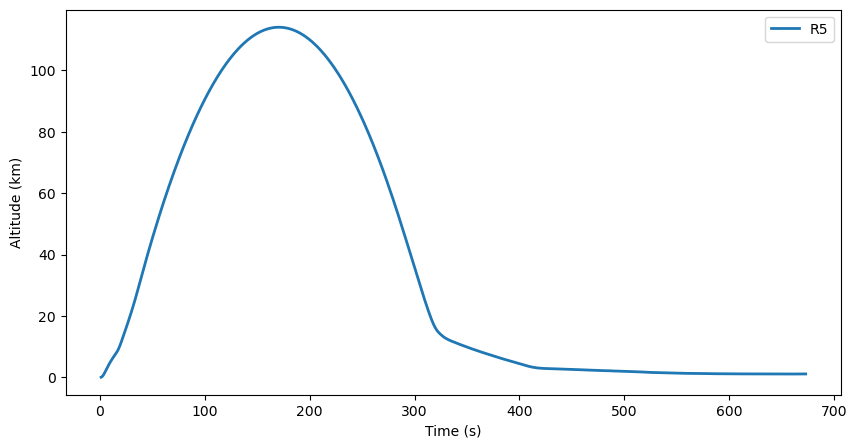

In [4]:
times3 = []
times5 = []
times10 = []
times18 = []
altitudes3 = []
altitudes5 = []
altitudes10 = []
altitudes18 = []
with open(r"C:\Users\ashto\DAPPEr2\UDIP4\data\NRW-6381 ROCKON 41.133 R5 POSDAT 06202024.txt", "r") as rockonData5: #R5
    next(rockonData5)  # Skip the header
    for line in rockonData5:
        parts = line.strip().split()
        times5.append(float(parts[1]))  # time values
        altitudes5.append(float(parts[9]) / 1000)  # altitude values in km
with open(r"C:\Users\ashto\DAPPEr2\UDIP4\data\NRW-6381 ROCKON 41.133 R3 POSDAT 06202024.txt", "r") as rockonData3: #R3
    next(rockonData3)  # Skip the header
    for line in rockonData3:
        parts = line.strip().split()
        times3.append(float(parts[1]))  # time values
        altitudes3.append(float(parts[9]) / 1000)  # altitude values in km
with open(r"C:\Users\ashto\DAPPEr2\UDIP4\data\NRW-6381 ROCKON 41.133 R10 POSDAT 06202024.txt", "r") as rockonData10: #R10
    next(rockonData10)  # Skip the header
    for line in rockonData10:
        parts = line.strip().split()
        times10.append(float(parts[1]))  # time values
        altitudes10.append(float(parts[9]) / 1000)  # altitude values in km
with open(r"C:\Users\ashto\DAPPEr2\UDIP4\data\NRW-6381 ROCKON 41.133 R18 POSDAT 06202024.txt", "r") as rockonData18:
    next(rockonData18)  # Skip the header
    for line in rockonData18:
        parts = line.strip().split()
        times18.append(float(parts[1]))  # time values
        altitudes18.append(float(parts[9]) / 1000)  # altitude values in km
apogee3 = max(altitudes3)
apogee5 = max(altitudes5)
apogee10 = max(altitudes10)
apogee18 = max(altitudes18)
plt.figure(figsize=(10, 5))
# plt.plot(times3, altitudes3, label= "R3", lw=2)
plt.plot(times5, altitudes5, label= "R5",lw=2) #i am using these values for data analysis 
# plt.plot(times10, altitudes10, label= "R10",lw=2)
# plt.plot(times18, altitudes18, label= "R18",lw=2, ls='--')
plt.xlabel("Time (s)")
plt.ylabel("Altitude (km)")
plt.legend()
# plt.axvline(200)
# plt.axvline(140)
# plt.axhline(109)
# plt.xlim(100,250)
plt.show()
#looks like R3,R10 messed up until t=100s, then they all make the same shape, 
# R5 and R18 look very similar, I am arbitrarily using R5 for analysis

In [ ]:
packets = import_data('data/packets/UDIP_4_800s.json')
ne = np.array([])
Te = np.array([])
temp_error = np.array([])
dens_error = np.array([])

Imax = np.array([])
t_lin = np.array([])
starting_sweep = 170
stopping_sweep = 475 #170-475 are where we get good data roughly
st = packets['packets']['Full'][f'{starting_sweep}']['Start']
fin = packets['packets']['Full'][f'{stopping_sweep}']['Start']
step   = 1

for sweep in range(starting_sweep, stopping_sweep, step):
#get sweep data from packets
    c = 7
    V = np.array(packets['packets']['Full'][f'{sweep}']['Voltage'][c:]) 
    I = -np.array(packets['packets']['Full'][f'{sweep}']['Current0'][c:]) * 1e9
    Vfit, Ifit, popt, pcov = gen_fit(V, I) #fit it
#time data from packets
    start = packets['packets']['Full'][f'{sweep}']['Start']
    stop  = packets['packets']['Full'][f'{sweep}']['Stop']
    t_lin = np.append(t_lin, (start + stop)/2/1000 - 57)
#densities and temperatures
    ne = np.append(ne,popt[5])
    Te = np.append(Te,popt[6])
#errors    
    ne_std = np.sqrt(pcov[5,5])
    Te_std = np.sqrt(pcov[6, 6])
    temp_error = np.append(temp_error,Te_std)
    dens_error = np.append(dens_error,ne_std)

    # #For the bad values, cut IV to get just the top branch of it, hopefully yields better temperatures
    # if(Te[-1] >= 2000):
    #     FirstFitTe = Te[-1]
    #     midpoint = len(V) // 2  # Find the middle of the sweep
    #     V_new = V[midpoint:]  # Take only the second half
    #     I_new = I[midpoint:]
    #     Vfit, Ifit, popt, pcov = gen_fit(V_new, I_new)

    #     #overwrite the Te and ne values with the new fit results
    #     Te[-1] = popt[6]
    #     if Te[-1] >= 2000:
    #         print(f"Warning: Sweep {sweep} still has Te >= 2000 (Te = {Te[-1]}) after second fit, went from {FirstFitTe} -> {Te[-1]}")
    #     ne[-1] = popt[5]
    #print(f"Sweep #: {sweep}")
    Imax = np.append(Imax, np.max(I))
ne = ne * 1e-6 #go to cm^-3
dens_error = dens_error * 1e-6

C:\Users\ashto\AppData\Local\Temp\ipykernel_20792\1250922252.py:2: RuntimeWarning: invalid value encountered in sqrt
  I = a * ((x - V0))**m
C:\Users\ashto\AppData\Local\Temp\ipykernel_20792\1250922252.py:2: RuntimeWarning: invalid value encountered in power
  I = a * ((x - V0))**m


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.

Temperature error

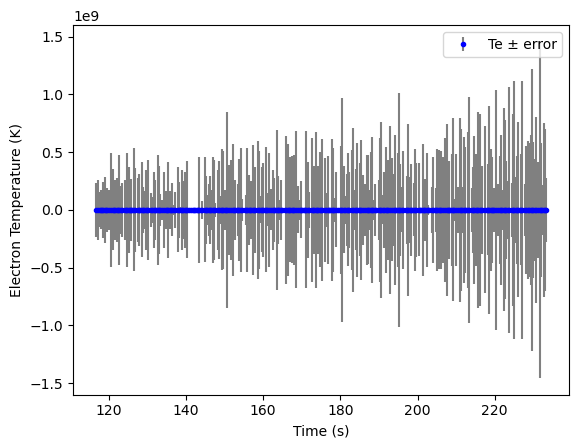

In [ ]:
plt.errorbar(t_lin, Te, yerr=temp_error, fmt='.',color='blue',ecolor='grey', label='Te ± error')
plt.xlabel("Time (s)")
plt.ylabel("Electron Temperature (K)")
plt.legend()
plt.show()

Density error

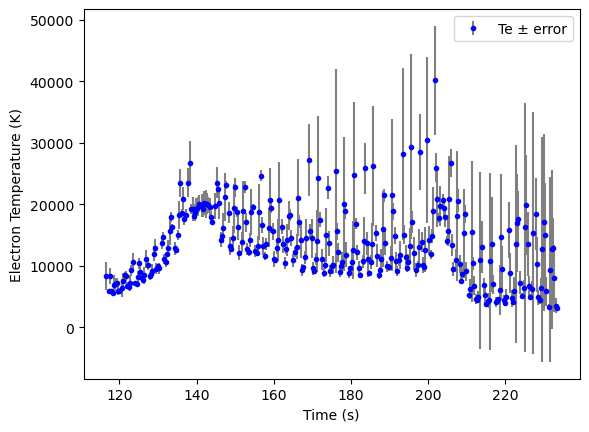

In [ ]:
plt.errorbar(t_lin, ne, yerr=dens_error, fmt='.',color='blue',ecolor='grey', label='Te ± error')
plt.xlabel("Time (s)")
plt.ylabel("Electron Temperature (K)")
plt.legend()
plt.show()

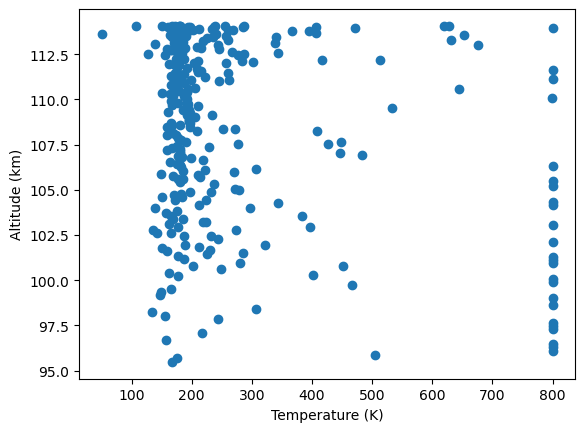

In [ ]:
altitude_function = interp1d(times5, altitudes5) 
interpolated_altitudes = altitude_function(t_lin) # Make altitude array based on time values from IV data
#plt.xlim(0,1000)
plt.scatter(Te, interpolated_altitudes) # this is both ascending and descending, want to separate
plt.xlabel("Temperature (K)")
plt.ylabel("Altitude (km)")

apogee_value = np.where(interpolated_altitudes == apogee5)[0][0] #cutting list at apogee to find temperatures going up


In [ ]:
from scipy.stats import binned_statistic
def bin_average_scipy(x, y, binsize=1.0):
    """
    Computes the average of x-values binned by y-values using scipy's binned_statistic.
    Parameters
    ----------
    x : array-like
        The dependent variable to average (temperature or density)
    y : array-like
        The independent variable to bin by (altitude).
    binsize : float, optional
        Width of each bin along the y-axis. Default is 1.0.

    Returns
    -------
    x_avg : np.ndarray
        Array of average x-values for each bin.
    y_bin_centers : np.ndarray
        Center points of the y-axis bins, suitable for plotting on the y-axis.
    """
    y_bins = np.arange(min(y), max(y) + binsize, binsize) 
    stat, bin_edges, _ = binned_statistic(y, x, statistic='median', bins=y_bins) #using median for the red line, mean gets wacky for the noisier plots
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    return stat, bin_centers

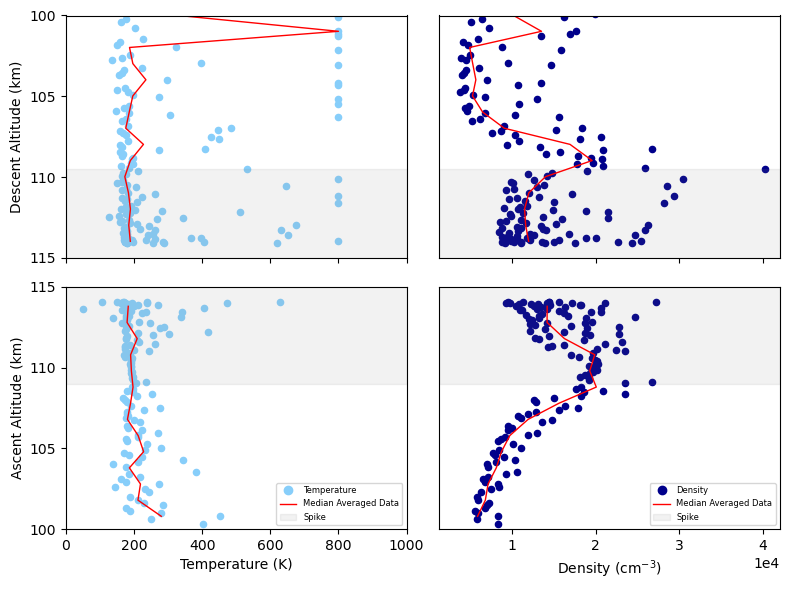

In [ ]:
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import ScalarFormatter
import matplotlib.patches as mpatches
fig, axes = plt.subplots(nrows=2, ncols=2, sharex='col', figsize=(8, 6))

#left side is temperature
axes[1, 0].scatter(Te[:apogee_value], interpolated_altitudes[:apogee_value], label='Ascending', s=20, color='lightskyblue') #[1,0] is bottom left
axes[0, 0].scatter(Te[apogee_value:], interpolated_altitudes[apogee_value:], label='Descending',s=20, color='lightskyblue') #[0,0] top left

axes[1, 0].set_xlabel('Temperature (K)')
axes[1, 0].set_ylabel('Ascent Altitude (km)')
axes[0, 0].set_ylabel('Descent Altitude (km)')

#right density
axes[1, 1].scatter(ne[:apogee_value], interpolated_altitudes[:apogee_value], label='Ascending',s=20, color='darkblue') #[1,1] bottom right
axes[0, 1].scatter(ne[apogee_value:], interpolated_altitudes[apogee_value:], label='Descending',s=20,color='darkblue')#[0,1] top right

axes[1, 1].set_xlabel(r'Density (cm$^{-3})$')

for ax in [axes[0, 1], axes[1, 1]]: #Remove y-axis labels and ticks from right-side plots
    ax.set_ylabel("")  
    ax.yaxis.set_tick_params(left=False, labelleft=False)

#tickmarks every 5 km to make it look neater
y_min, y_max = 100, 115
for ax in [axes[0, 0], axes[1, 0]]:
    ax.set_ylim(y_min, y_max)
    ax.yaxis.set_major_locator(MultipleLocator(5)) #tickmark every 5


for ax in [axes[0, 1], axes[1, 1]]:
    ax.set_ylim(y_min, y_max)
# Set scientific notation for the x-axis of the density plots for neatness
for ax in [axes[0, 1], axes[1, 1]]:
    formatter = ScalarFormatter()
    formatter.set_scientific(True)
    formatter.set_powerlimits((-2, 2))
    ax.xaxis.set_major_formatter(formatter)


#temp averages
Te_asc_avg, alt_asc_avg = bin_average_scipy(Te[:apogee_value], interpolated_altitudes[:apogee_value])
Te_desc_avg, alt_desc_avg = bin_average_scipy(Te[apogee_value:], interpolated_altitudes[apogee_value:])

axes[1, 0].plot(Te_asc_avg, alt_asc_avg, color='red', linewidth=1)
axes[0, 0].plot(Te_desc_avg, alt_desc_avg, color='red', linewidth=1)

# Density avg
ne_asc_avg, alt_asc_avg2 = bin_average_scipy(ne[:apogee_value], interpolated_altitudes[:apogee_value])
ne_desc_avg, alt_desc_avg2 = bin_average_scipy(ne[apogee_value:], interpolated_altitudes[apogee_value:])

axes[1, 1].plot(ne_asc_avg, alt_asc_avg2, color='red', linewidth=1)
axes[0, 1].plot(ne_desc_avg, alt_desc_avg2, color='red', linewidth=1)

# shading E layer
for ax in axes[0, :]:  #descent plots ([0, 0] & [0, 1])
    ax.axhspan(109.5, 116, color='gray', alpha=0.1)

for ax in axes[1, :]:  #ascent [1, 0] & [1, 1])
    ax.axhspan(109, 116, color='gray', alpha=0.1)

#legend
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
e_layer_patch = mpatches.Patch(color='gray', alpha=0.1, label='Spike')
median_line = Line2D([0], [0], color='red', linewidth=1, label='Median Averaged Data')
temp_scatter = Line2D([0], [0], marker='o', color='lightskyblue', linestyle='None', markersize=6, label='Temperature')
density_scatter = Line2D([0], [0], marker='o', color='darkblue', linestyle='None', markersize=6, label='Density')

axes[1,0].legend(handles=[temp_scatter, median_line, e_layer_patch], loc='lower right', fontsize=6)
axes[1,1].legend(handles=[density_scatter, median_line, e_layer_patch], loc='lower right',fontsize=6)



axes[0,0].set_xlim(0, 1000)
axes[0,0].invert_yaxis()
axes[0,1].invert_yaxis()
#axes[0,1].axhline(109)
#axes[1,1].axhline(109)
plt.tight_layout()
plt.show()

In [ ]:
perr = np.sqrt(np.diag(pcov))
print(perr)

[6.40852464e+06 2.38885892e+04 1.36369972e+05 3.92939162e+07
 1.33991965e+00 2.72113384e+08 2.77114288e+08]
